Objectives

- Order the rows of a table using a chosen column
- Convert to long format to plot multiple columns at the same time
- Switch between short/long table format

Content to cover

- sort_values
- pivot, pivot_table
- melt


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Air quality data about $NO_2$ and Particulate matter less than 2.5 micrometers is used, made available by [openaq](https://openaq.org) and using the [py-openaq](http://dhhagan.github.io/py-openaq/index.html) package. The `air_quality_long.csv` data set provides $NO_2$ and $pm25$ values for the measurement stations _FR04014_, _BETR801_ and _London Westminster_ in respectively Paris, Antwerp and London. In this case, the data set is provided in a so-called long data format representation.

In [31]:
air_quality = pd.read_csv("../data/air_quality_long.csv", index_col="date.utc", parse_dates=True)
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


The `no2` data set contains only the measurements of $NO_2$:

In [32]:
no2 = air_quality[air_quality["parameter"] == "no2"]

##  Reshape the layout of tables

### Sort table rows

> I want to arrange the titanic date according to the age of the passengers.

In [33]:
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


> I want to arrange the titanic date according to the cabin class and age in descending order.

In [34]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


With `sort_values`, the rows in the table are sorted according to the defined column(s). The index will follow the row order. Sorting is also possible acccording to the index labels or a combination of the values and index.

__To user guide:__ More details about sorting of tables is provided in :ref:`basics.sorting`.

### Long to wide table format

Let's use a small subset of the air quality data set, for each location the first two measurements:

In [35]:
no2_subset = no2.sort_index().groupby(["location"]).head(2).reset_index()
no2_subset

,date.utc,city,country,location,parameter,value,unit
0,2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
1,2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2,2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
3,2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
4,2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
5,2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


![](../schemas/07_pivot.svg)

> I want the values for the three stations as separate columns next to each other to plot them together

In [36]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
0,22.5,NaN,NaN
1,NaN,24.4,NaN
2,NaN,NaN,67.0
3,53.5,NaN,NaN
4,NaN,27.4,NaN
5,NaN,NaN,67.0


The `pivot` function is purely restructering of the data: a single value for each index/column combination is required. 

As Pandas support plotting of multiple columns (see [plotting tutorial](./4_plotting.ipynb)) out of the box, the conversion from long to wide format enables the plotting of the different time series at the same time:

In [41]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


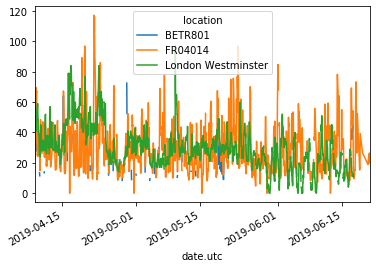

In [37]:
no2.pivot(columns="location", values="value").plot()

<div class="alert alert-info">
    
__Note__: When the `index` parameter is not defined, the existing index (row labels) is used.

</div>

__To user guide:__ For more information about `pivot`, see :ref:`reshaping.reshaping`

### Pivot table

![](../schemas/07_pivot_table.svg)

> I want the mean concentrations for $NO_2$ and $PM_{2.5}$ in each of the stations in table form

In [38]:
air_quality.pivot_table(values="value", index="location", 
                        columns="parameter", aggfunc="mean")

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In the case of `pivot`, the data iss only rearranged. When multiple values need to be aggregated (in this specific case, the values on different time steps) `pivot_table` can to be used, providing an aggregation function (e.g. mean) on how to combine these values.

Pivot table is a well known concept in spreadsheet software. When interested in summary columns for each variable separately as well, put the `margin` parameter to `True`:

In [40]:
air_quality.pivot_table(values="value", index="location", 
                        columns="parameter", aggfunc="mean",
                        margins=True)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


__To user guide:__ For more information about `pivot_table`, see :ref:`reshaping.pivot`

<div class="alert alert-info">
    
__Note__: If you're wondering, `pivot_table` is indeed directly linked to `groupby`. The same values can be calculated by grouping on both `parameter` and `location`: 

    air_quality.groupby(["parameter", "location"]).mean()
    
__To user guide:__ Have a look at `groupby` in combination with `unstack` at  [:ref:`TODO LABEL`](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#combining-with-stats-and-groupby)

</div>

### Wide to long format

In [50]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


> I want to collect all measurements in a single column

In [57]:
no2 = no2_pivoted.melt(id_vars="date.utc", 
                       value_vars=["BETR801", "FR04014", "London Westminster"],
                       value_name="NO_2",
                       var_name="id_location")

In [ ]:
no2